In [1]:
# Data analysis
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter(action= 'ignore')

# Setting maximum column to display
pd.set_option('display.max_columns', None)

# Loading Data
fifa = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\fifa.csv")

In [3]:
# Quick look
fifa.head()


,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [4]:
# Shape of data
fifa.shape

(17954, 92)

In [5]:
# Info about data
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

## Eliminating unnecessary columns from data analysis

In [6]:
fifa.drop(columns = ["id", "full_name", "birth_date","club_jersey_number", "national_jersey_number", "tags", "traits"], inplace=True)

In [7]:
fifa.shape

(17954, 85)

# 1. Handling null values

## Getting all numerical columns having null values

In [8]:
numerical = fifa.select_dtypes(include='int' and 'float')
numerical_null = []
for i in numerical:
    if numerical[i].isnull().values.any() :
        numerical_null.append(i)

print(f" All numerical features having null values :: \n {numerical_null}")        
          

 All numerical features having null values :: 
 ['value_euro', 'wage_euro', 'release_clause_euro', 'club_rating', 'national_rating']


In [9]:
int_null_df = fifa[numerical_null]
int_null_df.head(3)

,value_euro,wage_euro,release_clause_euro,club_rating,national_rating
0,110500000.0,565000.0,226500000.0,86.0,82.0
1,69500000.0,205000.0,133800000.0,83.0,78.0
2,73000000.0,255000.0,144200000.0,82.0,84.0


In [10]:
# Filling all null values of numerical feature with mean and arbitary value 0

fifa['height_cm'] = fifa['height_cm'].fillna(round(fifa['height_cm'].mean(), 2))
fifa['weight_kgs'] = fifa['weight_kgs'].fillna(round(fifa['weight_kgs'].mean(), 2))
fifa['value_euro'] = fifa['value_euro'].fillna(round(fifa['value_euro'].mean()))
fifa['wage_euro'] = fifa['wage_euro'].fillna(round(fifa['wage_euro'].mean()))
fifa['release_clause_euro'] = fifa['release_clause_euro'].fillna(round(fifa['release_clause_euro'].mean()))
fifa['club_rating'] = fifa['club_rating'].fillna(0)
fifa['national_rating'] = fifa['national_rating'].fillna(0)

## Getting all categorical columns having null values

In [11]:
categorycal = fifa.select_dtypes(include='object')
categorycal_null = []
for i in categorycal:
    if categorycal[i].isnull().values.any():
        categorycal_null.append(i)
print("All Categorical columns having null values:: \n ")
print(categorycal_null)


All Categorical columns having null values:: 
 
['club_team', 'club_position', 'club_join_date', 'contract_end_year', 'national_team', 'national_team_position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


In [12]:
catory_null_df = pd.DataFrame(fifa[categorycal_null])
catory_null_df.head(3)

,club_team,club_position,club_join_date,contract_end_year,national_team,national_team_position,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,FC Barcelona,RW,2004-07-01,2021,Argentina,RF,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,Tottenham Hotspur,LCM,2013-08-30,2020,Denmark,CAM,79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,Manchester United,LCM,2016-08-09,2021,France,RDM,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3


In [13]:
# Filling null values of 'club_team' with arbitrary value
fifa['club_team'] = fifa['club_team'].fillna("unknown")
fifa['club_team'].isnull().sum()

# Filling null values of 'club_position' with its mode value
fifa['club_position'] = fifa['club_position'].fillna(fifa['club_position'].mode()[0])
fifa['club_position'].isnull().sum()

# Filling null values with arbitrary value
fifa['club_join_date'] = fifa['club_join_date'].fillna('missing')
fifa['contract_end_year'] = fifa['contract_end_year'].fillna('missing')
fifa['national_team'] = fifa['national_team'].fillna('unknown')
fifa['national_team_position'] = fifa['national_team_position'].fillna('unknown')


In [14]:
# Skill columns
skill_col = ['LS', "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", "RM", "LWB",
            "LDM", "CDM", "RDM", "RWB", "LB", "LCB", "CB", "RCB", "RB"]

# function to convert skill rating at each position
def skill_rating(val):
    if type(val) == str:
        s1 = val[:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val
    
for k in skill_col:
    fifa[k] = fifa[k].apply(skill_rating)
    fifa[k] = fifa[k].fillna(0.0) # filling null values with arbitrary value i.e. 0.0


In [15]:
# After handling null value, now checking still any null value present in data or not
if fifa.isnull().values.any() == True:
    print("Still null values remains in some columns")
else:
    print("Not any null values present in the data")
        

Not any null values present in the data


In [16]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   nationality                    17954 non-null  object 
 6   overall_rating                 17954 non-null  int64  
 7   potential                      17954 non-null  int64  
 8   value_euro                     17954 non-null  float64
 9   wage_euro                      17954 non-null  float64
 10  preferred_foot                 17954 non-null  object 
 11  international_reputation(1-5)  17954 non-null  int64  
 12  weak_foot(1-5)                 17954 non-null 

# 2. EDA (with data visualisation)

In [17]:
# Nationality of the players
fifa['nationality'].value_counts()

England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
Papua New Guinea           1
South Sudan                1
Malta                      1
Yemen                      1
United Arab Emirates       1
Name: nationality, Length: 160, dtype: int64

In [18]:
fifa['nationality'].value_counts()[0:10]

England        1658
Germany        1199
Spain          1070
France          925
Argentina       904
Brazil          832
Italy           655
Colombia        624
Japan           466
Netherlands     441
Name: nationality, dtype: int64

Text(0.5, 1.0, 'Nationality of the players')

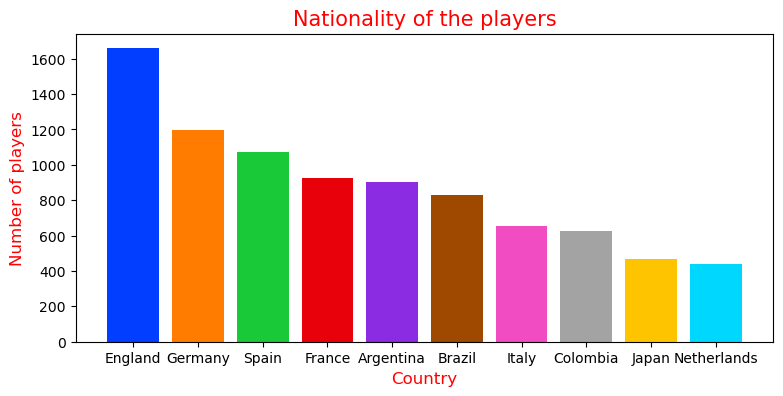

In [19]:
plt.figure(figsize = (9,4))
color = sns.color_palette('bright')[0:10]

plt.bar(list(fifa['nationality'].value_counts()[0:10].keys()), list(fifa['nationality'].value_counts()[0:10]), color=color)
plt.xlabel("Country", size=12, c='r')
plt.ylabel("Number of players", size=12, c='r')
plt.title("Nationality of the players", size=15, c='r')

In [20]:
# Salaries of different players
players_sal = fifa[["name","wage_euro", "nationality", "club_team"]]
players_sal.sort_values(by='wage_euro', ascending=False).head()

,name,wage_euro,nationality,club_team
0,L. Messi,565000.0,Argentina,FC Barcelona
17938,L. Suárez,455000.0,Uruguay,FC Barcelona
17939,L. Modrić,420000.0,Croatia,Real Madrid
17944,Cristiano Ronaldo,405000.0,Portugal,Juventus
17941,K. De Bruyne,355000.0,Belgium,Manchester City


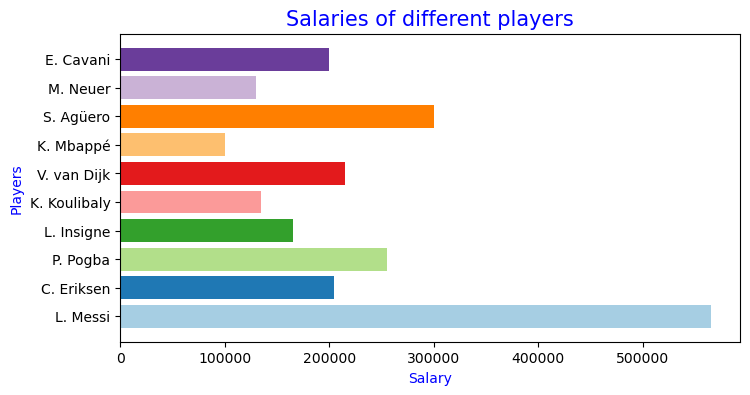

In [21]:
plt.figure(figsize=(8,4))
c = sns.color_palette('Paired')[0:10]

plt.barh(list(players_sal['name'][0:10]), list(players_sal['wage_euro'][0:10]), color=c)
plt.xlabel('Salary', size=10, c='blue')
plt.ylabel('Players', size=10, c='blue')
plt.title("Salaries of different players", size=15, c='blue')
plt.show()

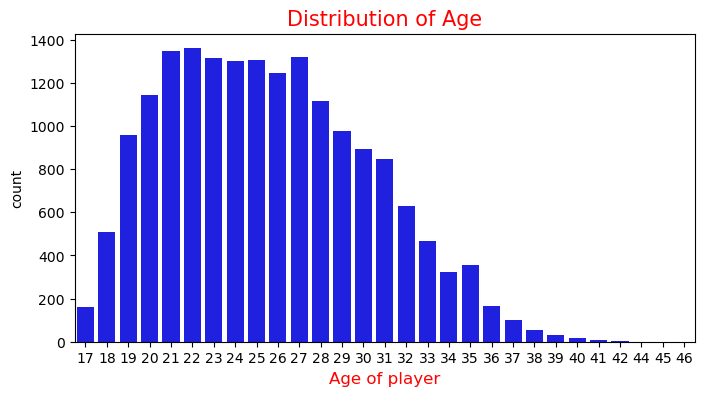

In [22]:
# Distribution of age of each player
age = fifa['age']
plt.figure(figsize = (8,4))
ax = sns.countplot(age, color='blue')
ax.set_xlabel(xlabel="Age of player", c='r', fontsize=12)
ax.set_title(label="Distribution of Age", c='r', fontsize=15)
plt.show()

###  Most of the players age is between 21 to 27

In [23]:
# Top 20 club_team with player's highest average overall rating
club = fifa.groupby('club_team')['overall_rating'].mean().reset_index().sort_values("overall_rating", ascending=False)
club.head()

,club_team,overall_rating
77,Belgium,82.500000
345,Juventus,82.040000
337,Italy,82.000000
476,Portugal,81.571429
333,Inter,79.600000


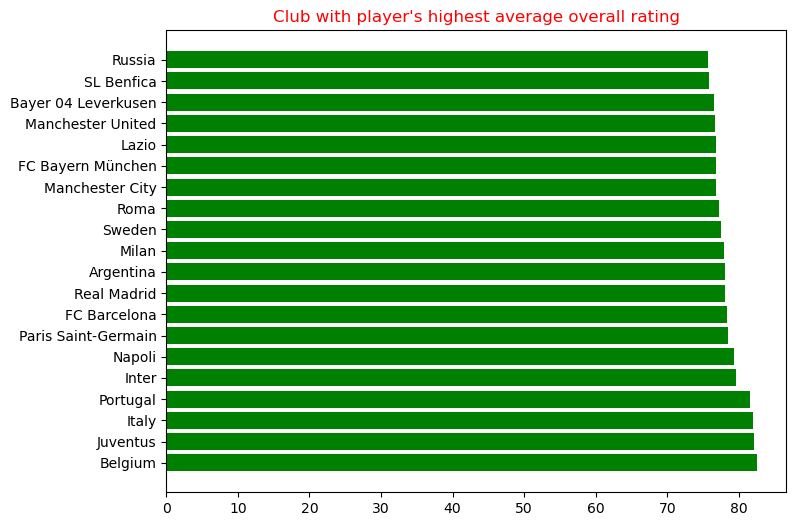

In [24]:
plt.figure(figsize=(8,6))
plt.barh(list(club['club_team'][0:20]), list(club['overall_rating'][0:20]), color='g')
plt.title("Club with player's highest average overall rating", c = 'r')
plt.show()


# working on categorical columns

In [25]:
# Nationality
fifa['nationality'].value_counts()

England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
Papua New Guinea           1
South Sudan                1
Malta                      1
Yemen                      1
United Arab Emirates       1
Name: nationality, Length: 160, dtype: int64

In [26]:
# Getting count of each nation and making list of nations whose count greater than 250
nat_count = fifa['nationality'].value_counts()
nat_list = nat_count[nat_count>250].index.tolist()

def major_nation(data):
    if (data['nationality'] in nat_list):
        return 1
    else:
        return 0
    
fifa['Major_nation'] = fifa.apply(major_nation, axis=1)

In [27]:
fifa['Major_nation'].head(5)

0    1
1    1
2    1
3    1
4    0
Name: Major_nation, dtype: int64

In [28]:
# positions
fifa['positions'].value_counts()

CB              2243
GK              2065
ST              1747
CM               764
CDM,CM           709
                ... 
LB,LM,CB           1
CF,CM,ST           1
CB,ST              1
RB,ST              1
CAM,CM,RW,RM       1
Name: positions, Length: 890, dtype: int64

In [29]:
# creating a new simplified position variable to account for all players position

def simple_position(data):
    if (data['positions'] == 'GK'):
        return 'GK'
    elif ((data['positions'] == 'LDM') | (data['positions'] == 'CDM') | (data['positions'] == 'RDM')):
        return 'DM'
    elif ((data['positions'] == 'LM') | (data['positions'] == 'LCM') | (data['positions'] == 'CM') | (data['positions'] == 'RCM')):
        return 'CM'
    elif ((data['positions'] == 'LAM') | (data['positions'] == 'CAM') | (data['positions'] == 'RAM') | (data['positions'] == 'RM')):
        return 'AM'
    elif ((data['positions'] == 'LW') | (data['positions'] == 'LWB') | (data['positions'] == 'RW') | (data['positions'] == 'RWB')):
        return 'WB'
    elif ((data['positions'] == 'LB') | (data['positions'] == 'LCB') | (data['positions'] == 'CB') | (data['positions'] == 'RB') | (data['positions'] == 'RCB')):
        return 'CB'
    elif ((data['positions'] == 'LF') | (data['positions'] == 'CF') | (data['positions'] == 'RF')):
        return 'MF'
    elif ((data['positions'] == 'RS') | (data['positions'] == 'ST') | (data['positions'] == 'LS')):
        return 'ST'
    else:
        return 'Unknown'
    

fifa['simple_positions'] = fifa.apply(simple_position, axis=1)


In [30]:
fifa['simple_positions'].unique()

array(['Unknown', 'CB', 'ST', 'GK', 'DM', 'AM', 'CM', 'WB', 'MF'],
      dtype=object)

In [31]:
# body_type
fifa['body_type'].value_counts()

Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: body_type, dtype: int64

In [32]:
# converting body type having value equal to 1 into major category
fifa['body_type'] = fifa['body_type'].replace(['Messi', 'Neymar', 'C. Ronaldo'], 'Lean')
fifa['body_type'] = fifa['body_type'].replace(['PLAYER_BODY_TYPE_25', 'Courtois', 'Akinfenwa', 'Shaqiri'], 'Normal')

In [33]:
# Checking body_type value counts after conversion
fifa['body_type'].value_counts()

Normal    10397
Lean       6471
Stocky     1086
Name: body_type, dtype: int64

## Deleting the old  & some unconvertable columns from dataset

In [34]:
fifa.drop(columns = ['name', 'nationality', 'positions',  'club_team', 'national_team', 'club_position', 'national_team_position', 
                     'club_join_date', 'contract_end_year'], inplace= True)

## Label encoding using sklearn

In [35]:
from sklearn import preprocessing

In [36]:
# preferred foot
le_foot = preprocessing.LabelEncoder()
le_foot.fit(['Left', 'Right'])
fifa['preferred_foot'] = le_foot.transform(fifa['preferred_foot'])

#simple_positions
le_nat = preprocessing.LabelEncoder()
le_nat.fit(['Unknown', 'CB', 'ST', 'GK', 'DM', 'AM', 'CM', 'WB', 'MF'])
fifa['simple_positions'] = le_nat.transform(fifa['simple_positions'])

# work_rate
le_rate = preprocessing.LabelEncoder()
le_rate.fit(['Medium/ Medium', 'High/ Medium', 'Medium/ High', 'High/ High', 'Medium/ Low', 
             'High/ Low', 'Low/ Medium', 'Low/ High', 'Low/ Low'])
fifa['work_rate'] = le_rate.transform(fifa['work_rate'])

#body_type
le_body = preprocessing.LabelEncoder()
le_body.fit(['Lean', 'Normal', 'Stocky'])
fifa['body_type'] = le_body.fit_transform(fifa['body_type'])


# 3. Correlation

In [37]:
# seperating iv & dv 
X = fifa.drop('value_euro', axis=1)
y = fifa['value_euro']  # predicting value of players

In [38]:
correlation = X.corr()
correlation

,age,height_cm,weight_kgs,overall_rating,potential,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_rating,national_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Major_nation,simple_positions
age,1.000000,0.059579,0.233819,0.461529,-0.259579,0.151531,0.002259,0.259977,0.061108,0.029681,-0.090472,0.203632,0.061620,0.015064,0.050113,0.133357,0.074761,0.151723,0.137151,0.147752,0.016334,0.147628,0.196003,0.185018,0.091552,-0.151665,-0.144265,-0.013177,0.463421,-0.083610,0.158875,0.183816,0.103804,0.339671,0.164655,0.264859,0.198131,0.085510,0.193201,0.147924,0.394717,0.146725,0.118362,0.103008,0.100785,0.105334,0.104697,0.115960,0.102587,0.050275,0.050275,0.050275,0.021673,0.034337,0.034337,0.034337,0.021673,0.036955,0.036955,0.036955,0.025522,0.071671,0.071671,0.071671,0.025522,0.062369,0.098114,0.098114,0.098114,0.062369,0.064458,0.103794,0.103794,0.103794,0.064458,-0.021623,0.020766
height_cm,0.059579,1.000000,0.495320,0.038080,0.008526,0.021136,0.050176,0.026850,-0.130464,-0.320141,0.139972,0.039831,0.010851,0.034171,0.027078,-0.388805,-0.296794,-0.043058,-0.290321,-0.279702,-0.382181,-0.345927,-0.316407,-0.262813,-0.328643,-0.406415,-0.350074,-0.438373,-0.020000,-0.532396,-0.239960,-0.052169,-0.254794,0.318769,-0.305601,-0.073996,-0.078730,-0.353380,-0.287254,-0.272134,-0.111849,-0.089783,-0.081452,-0.086093,0.295386,0.296296,0.291707,0.296131,0.296989,-0.320455,-0.320455,-0.320455,-0.372204,-0.353679,-0.353679,-0.353679,-0.372204,-0.359604,-0.359604,-0.359604,-0.366506,-0.329755,-0.329755,-0.329755,-0.366506,-0.292732,-0.246577,-0.246577,-0.246577,-0.292732,-0.267152,-0.178875,-0.178875,-0.178875,-0.267152,-0.034476,-0.165775
weight_kgs,0.233819,0.495320,1.000000,0.150521,-0.015099,0.061651,0.072883,0.085086,-0.128875,-0.353601,0.129429,0.302726,0.035293,0.062119,0.064391,-0.394145,-0.294710,0.027698,-0.291826,-0.263662,-0.414172,-0.347161,-0.305299,-0.260840,-0.339170,-0.481583,-0.413238,-0.533050,0.082796,-0.663188,-0.198428,0.005741,-0.232554,0.610431,-0.278552,0.021926,-0.034607,-0.355281,-0.282234,-0.251453,-0.044538,-0.057559,-0.056318,-0.065965,0.342368,0.341784,0.339684,0.343853,0.343440,-0.321523,-0.321523,-0.321523,-0.398515,-0.372251,-0.372251,-0.372251,-0.398515,-0.382837,-0.382837,-0.382837,-0.391367,-0.341729,-0.341729,-0.341729,-0.391367,-0.299433,-0.237121,-0.237121,-0.237121,-0.299433,-0.269419,-0.150195,-0.150195,-0.150195,-0.269419,-0.068316,-0.159205
overall_rating,0.461529,0.038080,0.150521,1.000000,0.647249,0.574453,-0.047754,0.489416,0.216394,0.418718,-0.239725,0.088362,0.591957,0.578403,0.318277,0.398343,0.342331,0.347670,0.506819,0.396922,0.378718,0.423890,0.400878,0.489998,0.464336,0.204853,0.218443,0.275260,0.855767,0.114667,0.445306,0.271008,0.368749,0.360725,0.429458,0.397072,0.322030,0.362116,0.506812,0.350902,0.729278,0.292538,0.254481,0.225466,-0.030501,-0.029850,-0.032884,-0.021115,-0.027478,0.341564,0.341564,0.341564,0.331208,0.343017,0.343017,0.343017,0.331208,0.346935,0.346935,0.346935,0.334384,0.369385,0.369385,0.369385,0.334384,0.322630,0.340379,0.340379,0.340379,0.322630,0.309870,0.299307,0.299307,0.299307,0.309870,-0.083289,0.117200
potential,-0.259579,0.008526,-0.015099,0.647249,1.000000,0.481469,-0.040815,0.358874,0.167735,0.356241,-0.142695,-0.076010,0.556209,0.647540,0.279411,0.244438,0.247552,0.204059,0.368106,0.255954,0.315429,0.278243,0.230355,0.322550,0.350662,0.239457,0.241553,0.225621,0.505011,0.143429,0.289157,0.106849,0.199151,0.077918,0.265326,0.170005,0.151946,0.2476

In [39]:
#Getting features whose correlation value > 0.6
threshold=0.6
remov_col = set()
for row in range(len(correlation)):
    for col in range(row):
        if abs(correlation.iloc[row][col]) > threshold:
            remov_col.add(correlation.columns[row])
            
print(f"Top correlated features are : {len(remov_col)}")
              

Top correlated features are : 62


In [40]:
# Removing correlated columns whose correlation value greater than 60%, from main dataset
X.drop(remov_col, axis=1, inplace=True)

In [41]:
print(f"Shape of dataset after performing correlation :: {X.shape}")

Shape of dataset after performing correlation :: (17954, 15)


# Variance

In [42]:
from sklearn.feature_selection import VarianceThreshold

# Getting features which has less variance(i.e. variance < 20% )
var = VarianceThreshold(threshold=0.2)  
out = var.fit(X)
less_var_col = X.columns[out.get_support() == False]
less_var_col

Index(['preferred_foot', 'Major_nation'], dtype='object')

In [43]:
# Removing feature having variance < 20%, from dataset
X.drop(less_var_col, axis=1, inplace=True)

In [44]:
X.head()

,age,height_cm,weight_kgs,overall_rating,wage_euro,weak_foot(1-5),skill_moves(1-5),work_rate,body_type,national_rating,heading_accuracy,jumping,simple_positions
0,31,170.18,72.1,94,565000.0,4,4,7,0,82.0,70,68,7
1,27,154.94,76.2,88,205000.0,5,4,2,0,78.0,52,50,7
2,25,190.50,83.9,88,255000.0,4,5,2,1,84.0,75,83,7
3,27,162.56,59.0,88,165000.0,4,4,2,1,83.0,56,53,7
4,27,187.96,88.9,88,135000.0,3,2,0,1,0.0,83,81,1


In [45]:
print(f"Shape of data after performing variance : {X.shape}")

Shape of data after performing variance : (17954, 13)


In [46]:
X.columns # final independent variables

Index(['age', 'height_cm', 'weight_kgs', 'overall_rating', 'wage_euro',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'work_rate', 'body_type',
       'national_rating', 'heading_accuracy', 'jumping', 'simple_positions'],
      dtype='object')